A collection of scripts to visualise the results for stationary bandits. More details on the algorithms can be found at [Stationary Bandits](stationary_bandits_comparison.ipynb).

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from collections import defaultdict
from jupyterthemes import jtplot

sns.set(style="ticks", context="talk", color_codes=True)
jtplot.style(theme='monokai', ticks=True, grid=False)
plt.rcParams.update({
    'axes.spines.right': False, 
    'axes.spines.top': False, 
    'lines.linewidth': 2., 
    'axes.xmargin': 0.01, 
    'savefig.dpi': 300,
})

%matplotlib inline

Before we compare the active inference algorithm with Thompson sampling and the UCB algorithm, we will illustrate how the values of action precision $\gamma$ and the precision of prior preferences $\lambda$ impact cumulative regret of the active inference agent, as a function of arm number $K$ and difficulty $\epsilon$. Bellow we show the expected regret rate $r(T)$ after $T=10^4$ trials. We define the regret rate as the trial and ensamble average of the cumulative regret. Hence,

$$r(T) = \frac{1}{T} E[R(T)] = \frac{1}{N \cdot T} \sum_{n=1}^N \sum_{t=1}^T \left[p_{max} - p_{a_t^n}\right],$$

where $p_{a_t^n}$ denotes the probability associated with the arm that was selected on the $t$th trial and the $n$th sample. Note that $p_max = \frac{1}{2} + \epsilon$ and that in the case of stationary bandits the optimal arm does not change. Hence, we can fix the optimal arm to choice $a_t^n=1$. Hence we can rewrite the above expression as 

$$ r(T) = \epsilon \left(1 - p(a^*) \right), \qquad p(a^*) = \frac{1}{N \cdot T}\sum_{n=1}^N \sum_{t=1}^T \delta_{a_t^n, 1}.$$

For example, in the case of random choices with unifrom probability over arms we get the following regret rate

$$ r(T) = \epsilon \frac{K-1}{K} $$

we will use this as a regerence line on the following plots. 

In [125]:
def density_plots(algo_name, regrets, eps, Ks):
    fig, axes = plt.subplots(len(eps), len(Ks), sharey=True, sharex=True, figsize=(15, 10))
    for i, ϵ in enumerate(eps):
        for j, K in enumerate(Ks):
            sns.heatmap(np.flip(regrets[algo_name][ϵ][K].reshape(len(gammas), len(lambdas)), axis=0), 
                        vmin=0., 
                        vmax=.05, 
                        cmap='magma', 
                        ax=axes[i, j], 
                        cbar=False)
            if i == 0:
                axes[i, j].set_title(r'$K={}$'.format(K))
            if i == len(eps) - 1:
                axes[i, j].set_xlabel(r'$\lambda$')
                plt.setp(axes[i, j], 
                         xticks=[0, 4, 8, 12, 16],
                         xticklabels=(10.*lambdas).astype(np.int16)[::4]/10.)

        axes[i, 0].set_yticklabels(np.flip(gammas.astype(np.int16)[::2]));
        axes[i, 0].set_ylabel(r'$\gamma$');
        
        axt = axes[i, -1].twinx()
        axt.set_yticklabels([])
        axt.set_ylabel(r'$\epsilon={}$'.format(ϵ/10), rotation=-90)
        axt.grid(False)
        axt.tick_params(left=False, right=False)
        axes[i, -1].tick_params(left=False)

    return fig

In [3]:
gammas = np.arange(1., 21., 1.)
lambdas = np.arange(.0, 4., .2)
Ks = [5, 10, 20, 40, 80]

In [121]:
reg_summ = defaultdict(lambda: {})
for ϵ in [10, 25, 40]:
    tmp = np.load('res_AI_Ks_e{}.npz'.format(ϵ))
    for name in ['EFE', 'SUP', 'APP']:
        reg_summ[name][ϵ] = {}
        for K in Ks:
            reg_summ[name][ϵ][K] = tmp[name + '_K{}'.format(K)].mean(-1)[0, ..., -1]

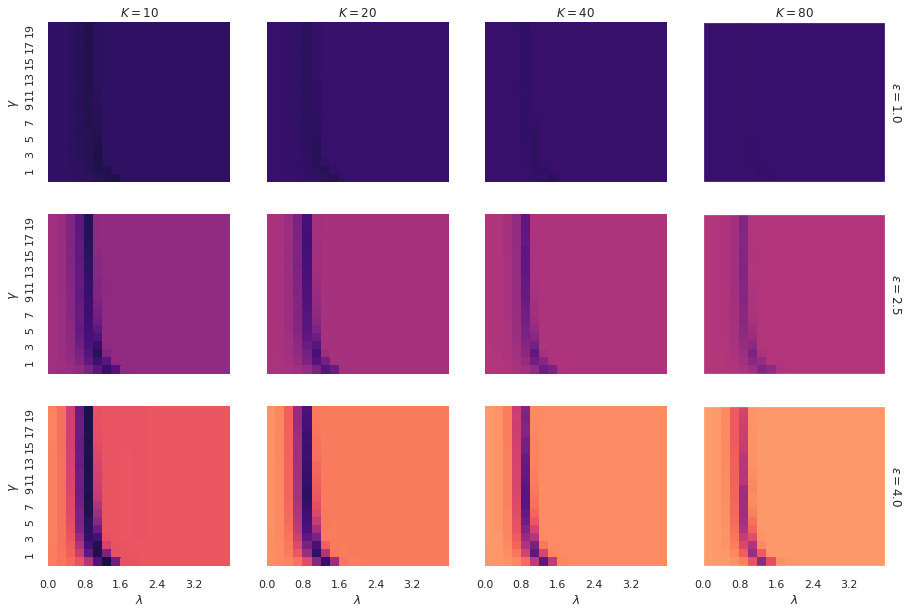

In [126]:
fig = density_plots('EFE', reg_summ, [10, 25, 40], [10, 20, 40, 80])

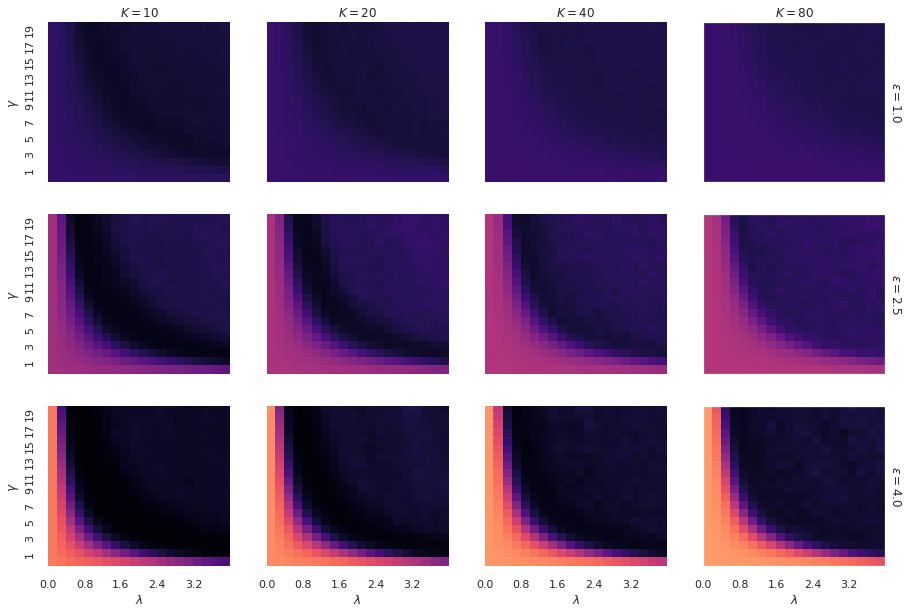

In [127]:
fig = density_plots('SUP', reg_summ, [10, 25, 40], [10, 20, 40, 80])

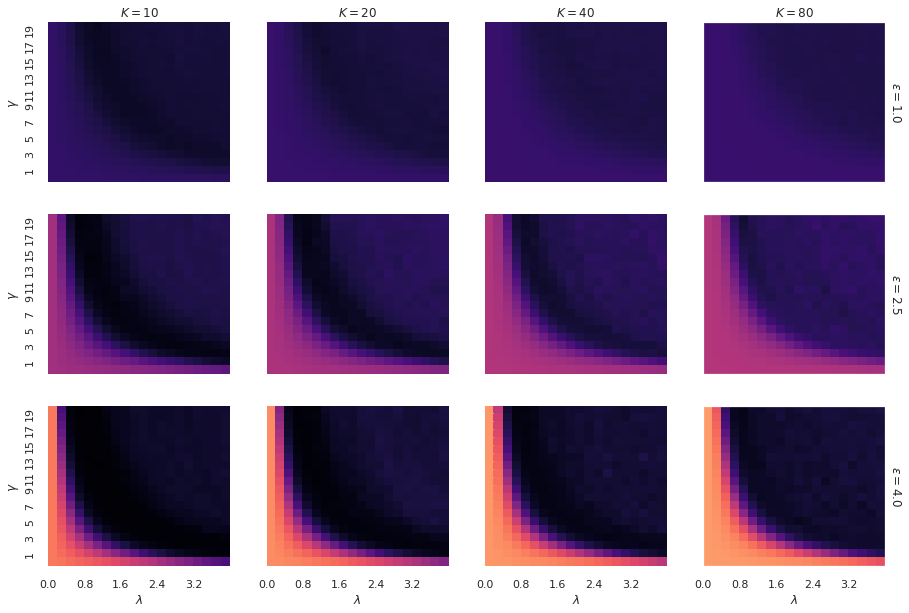

In [128]:
fig = density_plots('APP', reg_summ, [10, 25, 40], [10, 20, 40, 80])

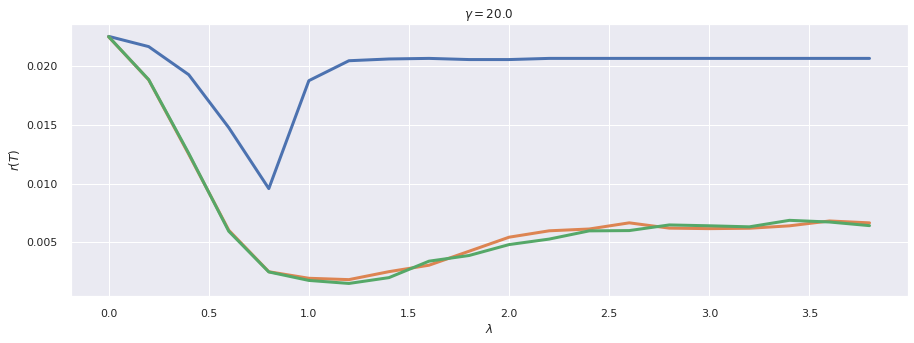

In [73]:
plt.figure(figsize=(15, 5))
eps = 25
K = 10
g = 19
plt.plot(lambdas, reg_summ['EFE'][eps][K].reshape(len(gammas), len(lambdas))[10], lw=3, label='EFE');
plt.plot(lambdas, reg_summ['SUP'][eps][K].reshape(len(gammas), len(lambdas))[10], lw=3, label='SUP');
plt.plot(lambdas, reg_summ['APP'][eps][K].reshape(len(gammas), len(lambdas))[10], lw=3, label='APP');
plt.xlabel(r'$\lambda$');
plt.ylabel(r'$r(T)$');
plt.title(r'$\gamma={}$'.format(gammas[g]));

In what follows we will compare the active inference based agent ($\textrm{AI}_{\textrm{APP}}$) with agents using the upper confidence bound (UCB) and the optimistic Thomspon sampling (OTS) as action selection algorithms. We will first consider the depndence of regret rate on the number of arms $K$ and difficulty $\epsilon$, after $T=10^4$ steps, and than look in more details at the step vise dependence of the regret rate $r(t)$.

In [9]:
Ks = [5, 10, 20, 40, 80]
reg_summ = defaultdict(lambda: {})
for ϵ in [10, 25, 40]:
    tmp = np.load('res_RL_Ks_e{}.npz'.format(ϵ))
    for name in ['OTS', 'BUCB']:
        reg_summ[name][ϵ] = {}
        for K in Ks:
            reg_summ[name][ϵ][K] = tmp[name + '_K{}'.format(K)][0]
    
    if ϵ == 10:
        tmp = np.load('res_BUCB_Ks_e{}.npz'.format(ϵ))
        for K in Ks:
            reg_summ['BUCB'][ϵ][K] = tmp[name + '_K{}'.format(K)][0]
    
    if ϵ == 10:
        tmp = np.load('res_AI_Ks_e{}.npz'.format(ϵ))
        for name in ['APP', 'SUP']:
            reg_summ[name][ϵ] = {}
            for K in Ks:
                reg_summ[name][ϵ][K] = np.mean(tmp[name + '_K{}'.format(K)][0], -1)

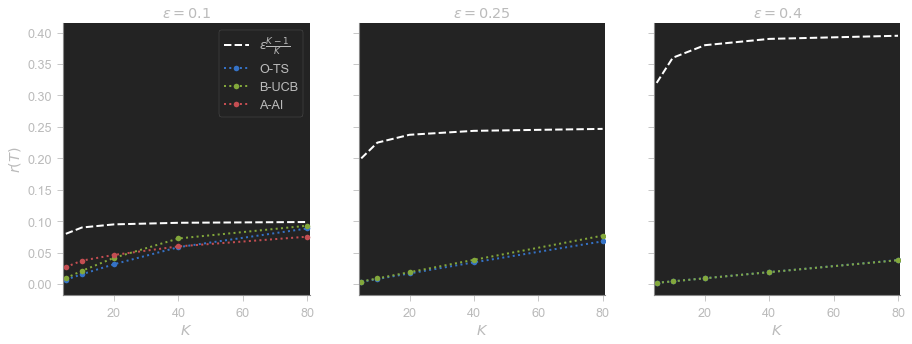

In [12]:
Ks = np.array(Ks)
fig, axes = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True)
T=10000

for i, eps in enumerate([10, 25, 40]):
    axes[i].plot(Ks, .01*eps * (Ks - 1)/Ks, 'w--', lw=2, label=r'$\epsilon\frac{K-1}{K}$');
#     axes[i].plot(Ks, np.sqrt(Ks * T * np.log(T))/T, 'r--', lw=2, label=r'$\frac{\sqrt{K T \ln T}}{T}$');
    
    axes[i].set_title(r'$\epsilon={}$'.format(eps/100.))
    axes[i].set_xlabel('$K$')

    ots = []
    bucb = []
    app = []
    for K in Ks:
        ots.append(reg_summ['OTS'][eps][K].mean(-1)[-1])
        bucb.append(reg_summ['BUCB'][eps][K].mean(-1)[-1])
        if eps == 10:
            app.append(reg_summ['APP'][eps][K][..., -1].reshape(len(gammas), len(lambdas))[-1, 5])
        
    axes[i].plot(Ks, ots, 'o:', label='O-TS')
    axes[i].plot(Ks, bucb, 'o:', label='B-UCB')
    if eps == 10:
        axes[i].plot(Ks, app, 'o:', label='A-AI')

#     plt.xlabel(r'$K$')
#     plt.ylabel(r'$ \left\langle R(T) \right\rangle /T$')
#     plt.legend()
axes[0].set_ylabel(r'$r(T)$')
axes[0].legend()
fig.savefig('comparisson.png', dpi=300)

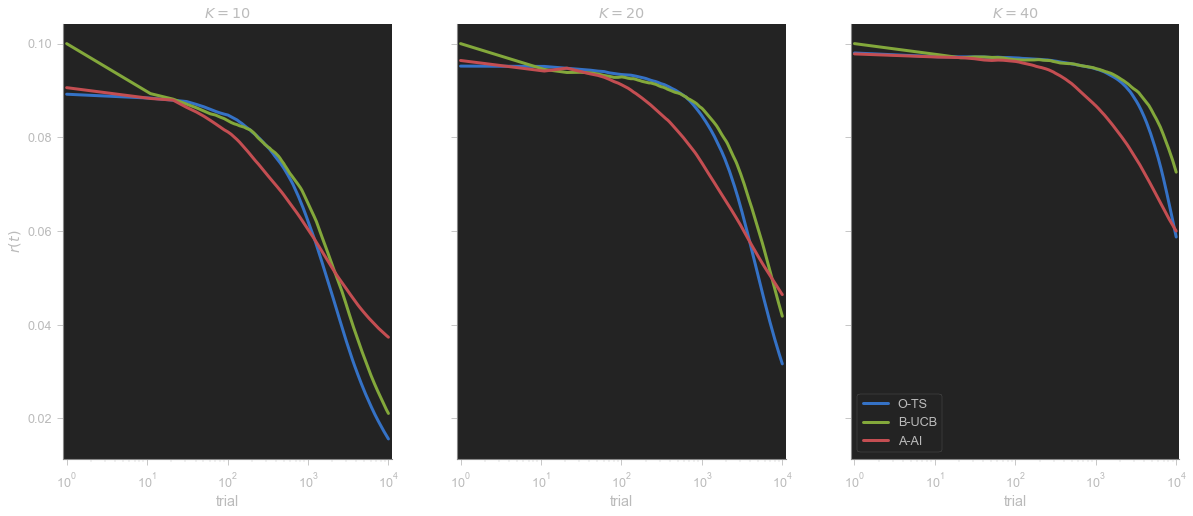

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 8), sharex=True, sharey=True)

trials = np.arange(1, 10001, 10)

for i, K in enumerate([10, 20, 40]):
#     axes[i].semilogx(trials, reg_summ['OTS'][10][K][:, ::10], 'b', alpha=.1);
    axes[i].semilogx(trials, np.mean(reg_summ['OTS'][10][K], -1), 'b', lw=3, label='O-TS')
    
#     axes[i].semilogx(trials, reg_summ['BUCB'][10][K][:, ::10], 'g', alpha=.1);
    axes[i].semilogx(trials, np.mean(reg_summ['BUCB'][10][K], -1), 'g', lw=3, label='B-UCB')
    
    axes[i].semilogx(trials, reg_summ['APP'][10][K].reshape(len(gammas), len(lambdas), -1)[-1, 5], 'r', lw=3, label='A-AI')
    axes[i].set_title(r'$K={}$'.format(K))
    axes[i].set_xlabel('trial')

axes[0].set_ylabel(r'$r(t)$')
plt.legend();